In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly,plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from scipy import stats
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df=pd.read_csv('AutoInsurance - AutoInsurance.csv')

In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
df.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6362,NT82538,Oregon,4496.977642,No,Basic,Bachelor,2/19/11,Unemployed,F,0,Suburban,Single,63,14,45,0,3,Personal Auto,Personal L3,Offer2,Branch,419.610914,Two-Door Car,Medsize
1624,NL74789,California,7324.928202,No,Premium,Bachelor,2/14/11,Unemployed,F,0,Suburban,Single,105,4,98,0,6,Special Auto,Special L2,Offer1,Branch,504.000000,Two-Door Car,Medsize
961,TA34903,Oregon,5838.899150,Yes,Basic,High School or Below,6/1/2011,Employed,M,81082,Urban,Married,73,5,85,0,4,Personal Auto,Personal L1,Offer2,Agent,281.295903,Four-Door Car,Large
3428,LX24476,Oregon,3619.060986,No,Extended,Bachelor,1/24/11,Unemployed,F,0,Urban,Married,98,27,47,0,1,Personal Auto,Personal L3,Offer2,Web,310.842085,Four-Door Car,Medsize
4468,BR39076,California,7633.821822,No,Basic,High School or Below,1/22/11,Unemployed,F,0,Suburban,Divorced,67,7,4,0,2,Personal Auto,Personal L3,Offer2,Agent,445.702958,Four-Door Car,Medsize


In [9]:
df.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,10/1/2011,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


### Categorical EDA

In [10]:
df.describe(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,10/1/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [11]:
df.drop(columns=['Customer'],inplace=True)

<Axes: xlabel='State', ylabel='count'>

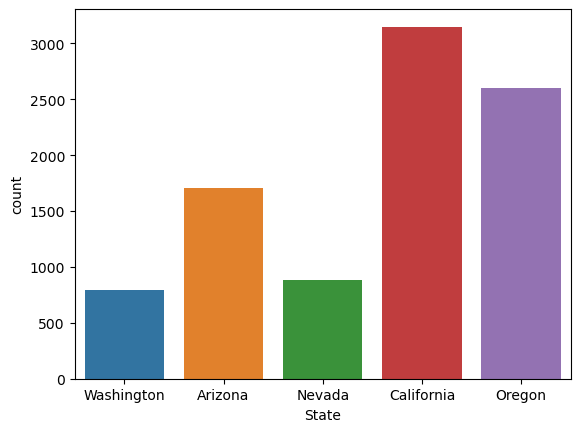

In [12]:
sns.countplot(x="State",data=df)

In [13]:
##Washington, Nevada has least customers compared to Arizona whereas California has highest customers followed by Oregon

<Axes: xlabel='State', ylabel='Customer Lifetime Value'>

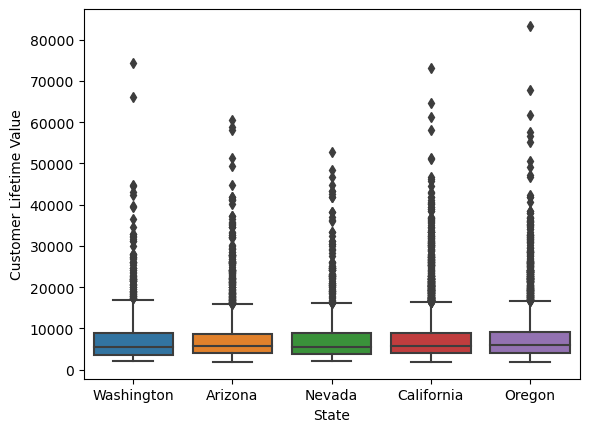

In [14]:
sns.boxplot(x='State',y='Customer Lifetime Value',data=df)

<Axes: xlabel='Response', ylabel='count'>

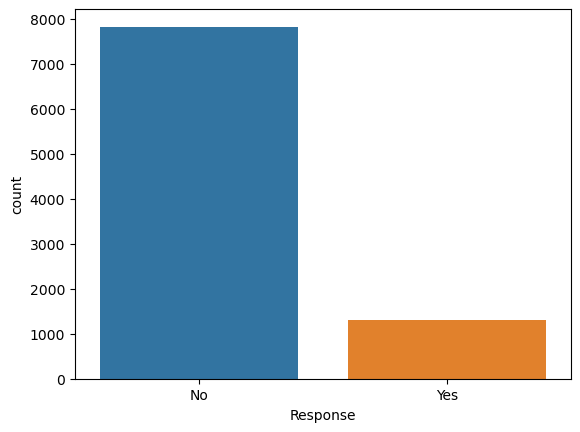

In [15]:
sns.countplot(x='Response',data=df)

<Axes: xlabel='Response', ylabel='Customer Lifetime Value'>

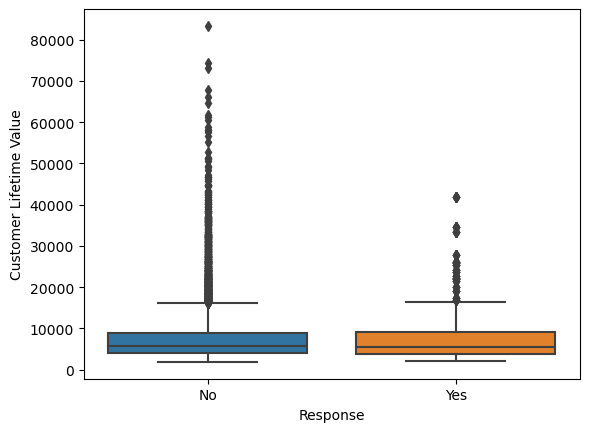

In [16]:
sns.boxplot(x='Response', y='Customer Lifetime Value',data=df)

<Axes: xlabel='Coverage', ylabel='count'>

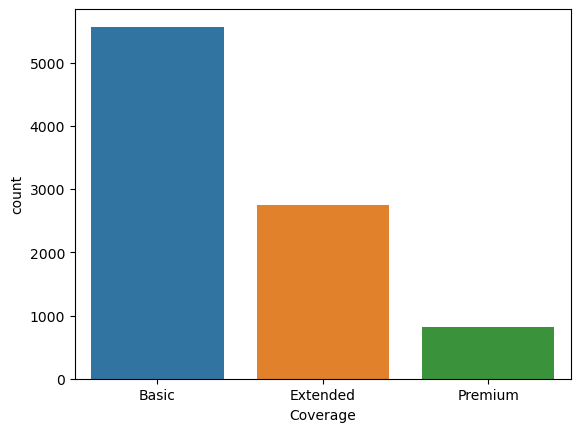

In [17]:
sns.countplot(x='Coverage',data=df)

<Axes: xlabel='Coverage', ylabel='Customer Lifetime Value'>

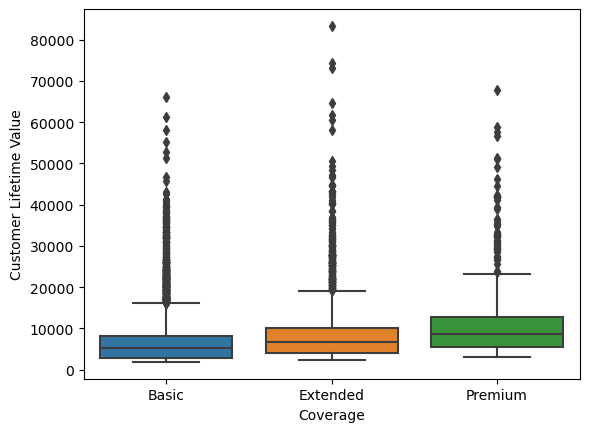

In [18]:
sns.boxplot(x='Coverage',y='Customer Lifetime Value',data=df)

<Axes: xlabel='Education', ylabel='count'>

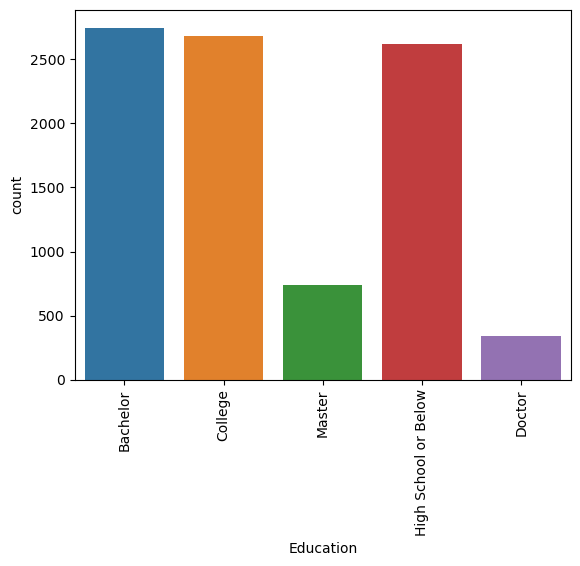

In [19]:
plt.xticks(rotation='vertical')
sns.countplot(x='Education',data=df)

<Axes: xlabel='Education', ylabel='Customer Lifetime Value'>

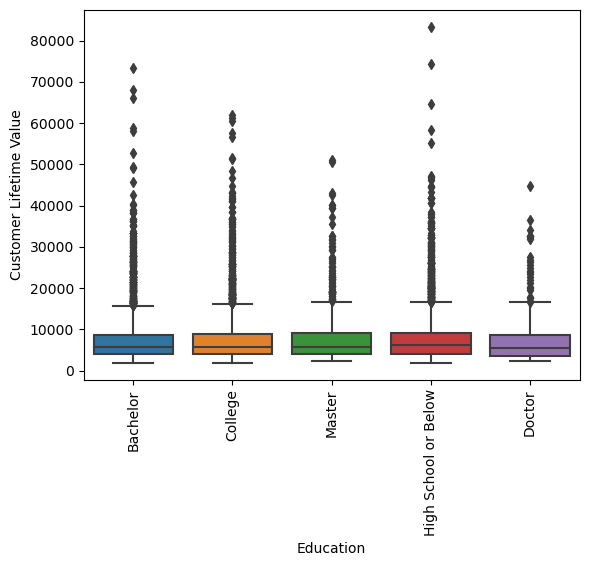

In [20]:
plt.xticks(rotation='vertical')
sns.boxplot(x='Education', y='Customer Lifetime Value',data=df)

<Axes: xlabel='EmploymentStatus', ylabel='count'>

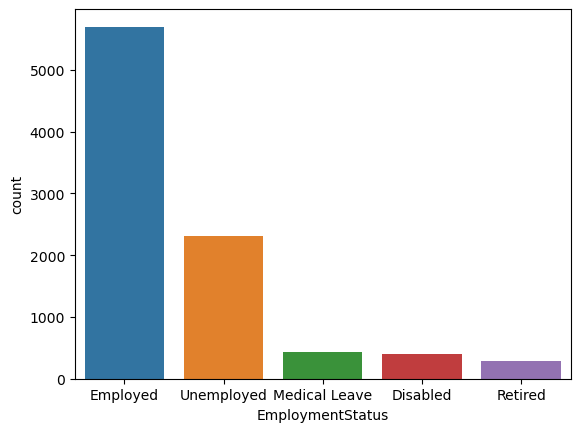

In [21]:
sns.countplot(x='EmploymentStatus',data=df)

<Axes: xlabel='EmploymentStatus', ylabel='Customer Lifetime Value'>

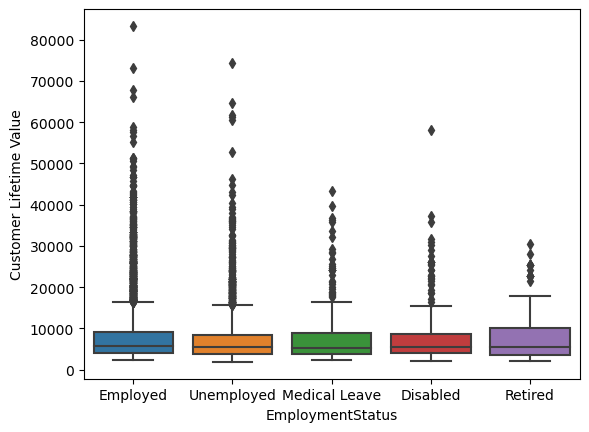

In [22]:
sns.boxplot(x='EmploymentStatus', y='Customer Lifetime Value',data=df)

<Axes: xlabel='Location Code', ylabel='count'>

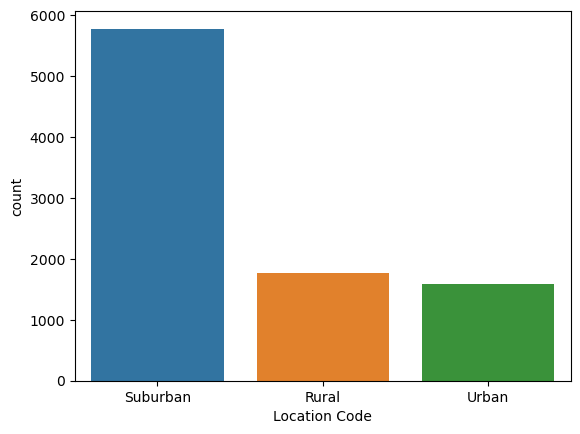

In [23]:
sns.countplot(x='Location Code',data=df)

<Axes: xlabel='Location Code', ylabel='Customer Lifetime Value'>

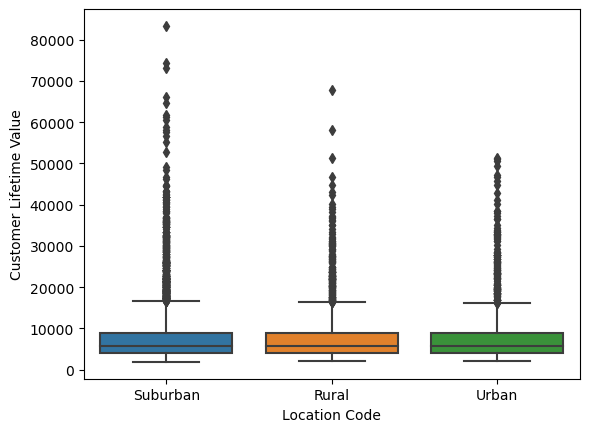

In [24]:
sns.boxplot(x='Location Code', y='Customer Lifetime Value',data=df)

<Axes: xlabel='Marital Status', ylabel='count'>

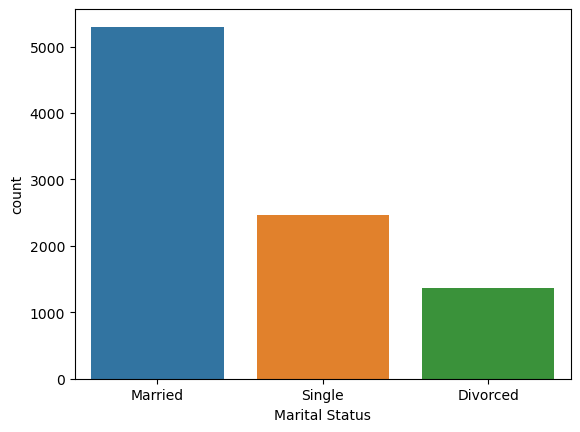

In [25]:
sns.countplot(x='Marital Status',data=df)


<Axes: xlabel='Marital Status', ylabel='Customer Lifetime Value'>

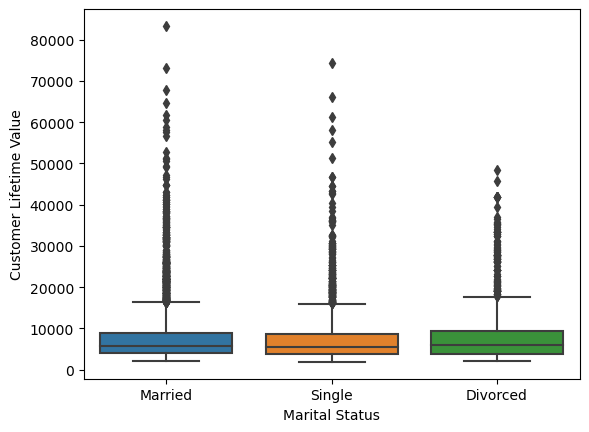

In [26]:
sns.boxplot(x='Marital Status',y='Customer Lifetime Value',data=df)

<Axes: xlabel='Policy Type', ylabel='count'>

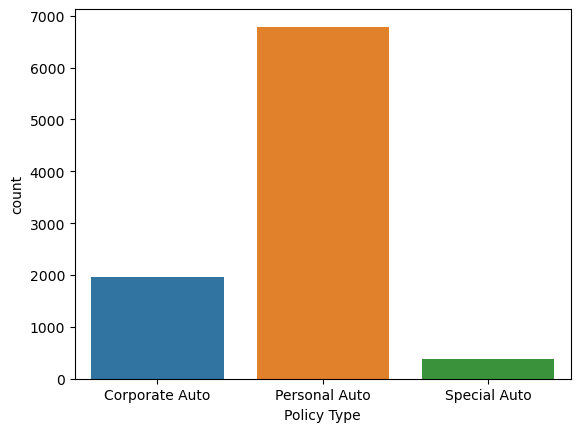

In [27]:
sns.countplot(x='Policy Type',data=df)

<Axes: xlabel='Policy Type', ylabel='Customer Lifetime Value'>

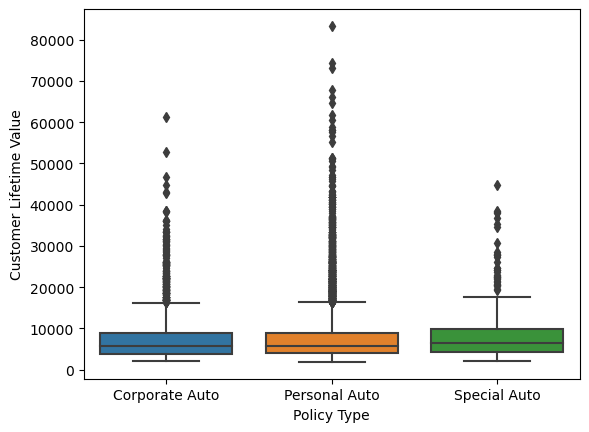

In [28]:
sns.boxplot(x='Policy Type', y='Customer Lifetime Value',data=df)

<Axes: xlabel='Vehicle Class', ylabel='count'>

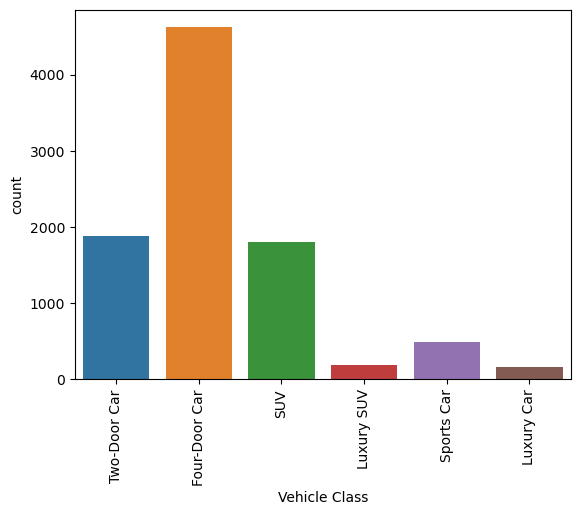

In [29]:
plt.xticks(rotation='vertical')
sns.countplot(x='Vehicle Class',data=df)

<Axes: xlabel='Vehicle Class', ylabel='Customer Lifetime Value'>

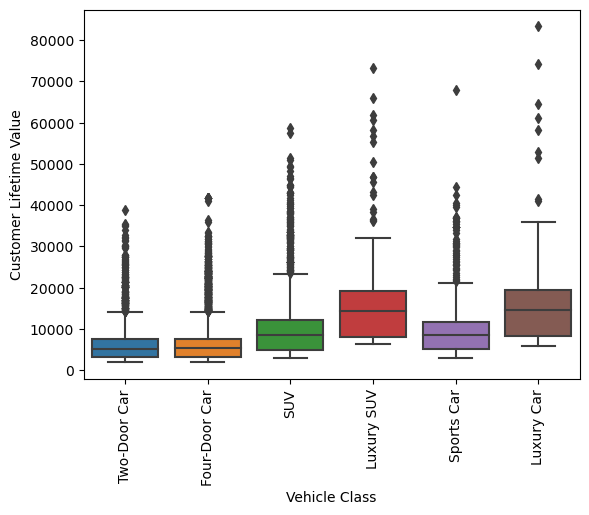

In [30]:
plt.xticks(rotation='vertical')
sns.boxplot(x='Vehicle Class',y='Customer Lifetime Value',data=df)

<Axes: xlabel='Vehicle Size', ylabel='count'>

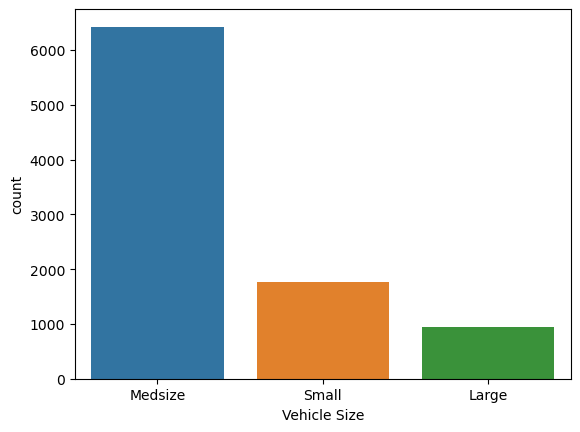

In [31]:
sns.countplot(x='Vehicle Size',data=df)


<Axes: xlabel='Vehicle Size', ylabel='Customer Lifetime Value'>

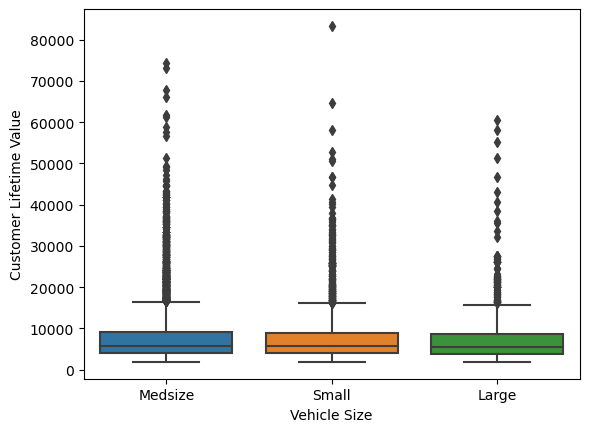

In [32]:
sns.boxplot(x='Vehicle Size', y='Customer Lifetime Value',data=df)

<Figure size 1500x1200 with 0 Axes>

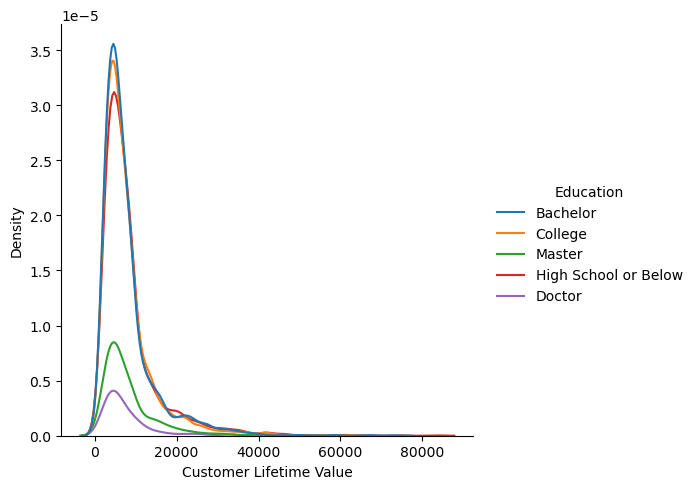

In [33]:
plt.figure(figsize=(15,12))
sns.displot(x='Customer Lifetime Value',hue='Education',kind='kde',data=df)

### Numerical Columns EDA

In [34]:
df.describe(include='number')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


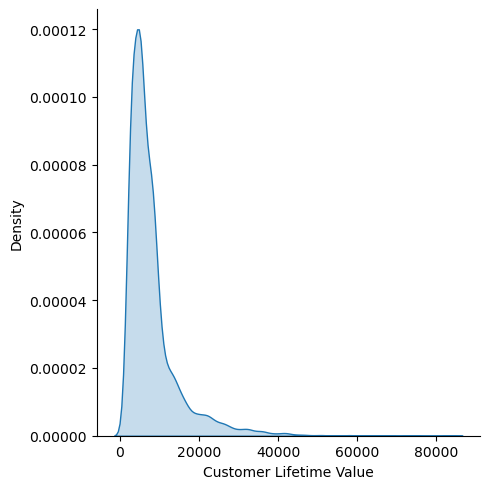

In [35]:
sns.displot(df['Customer Lifetime Value'],kind='kde',fill=True)

<Axes: xlabel='Income', ylabel='Customer Lifetime Value'>

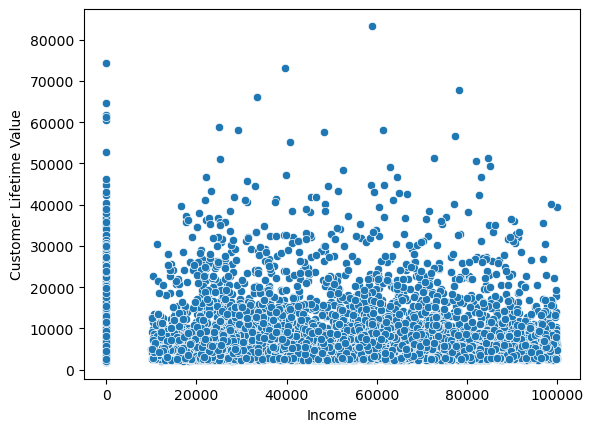

In [36]:
sns.scatterplot(y='Customer Lifetime Value',x='Income',data=df)

<Axes: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

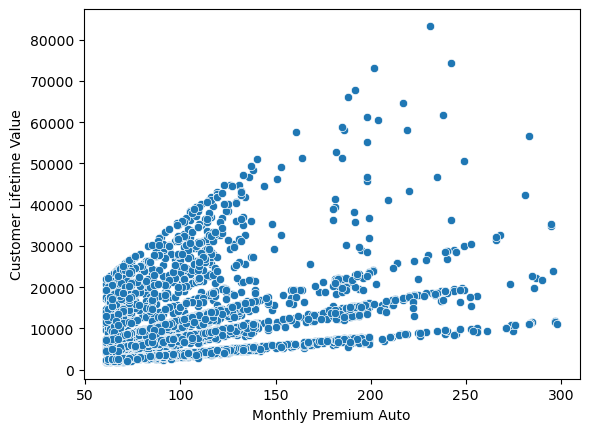

In [37]:
sns.scatterplot(x='Monthly Premium Auto',y='Customer Lifetime Value',data=df)

<Axes: xlabel='Total Claim Amount', ylabel='Customer Lifetime Value'>

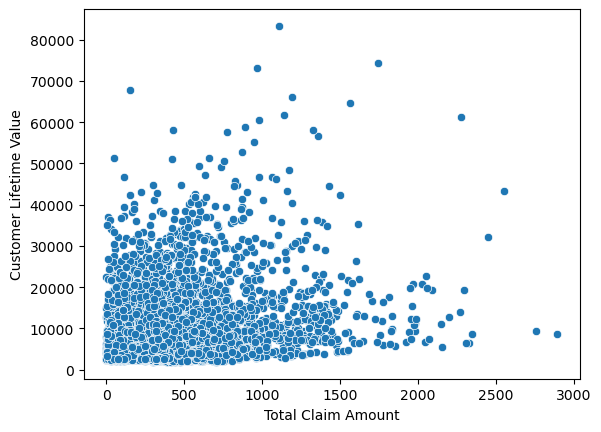

In [38]:
sns.scatterplot(y='Customer Lifetime Value',x='Total Claim Amount',data=df)

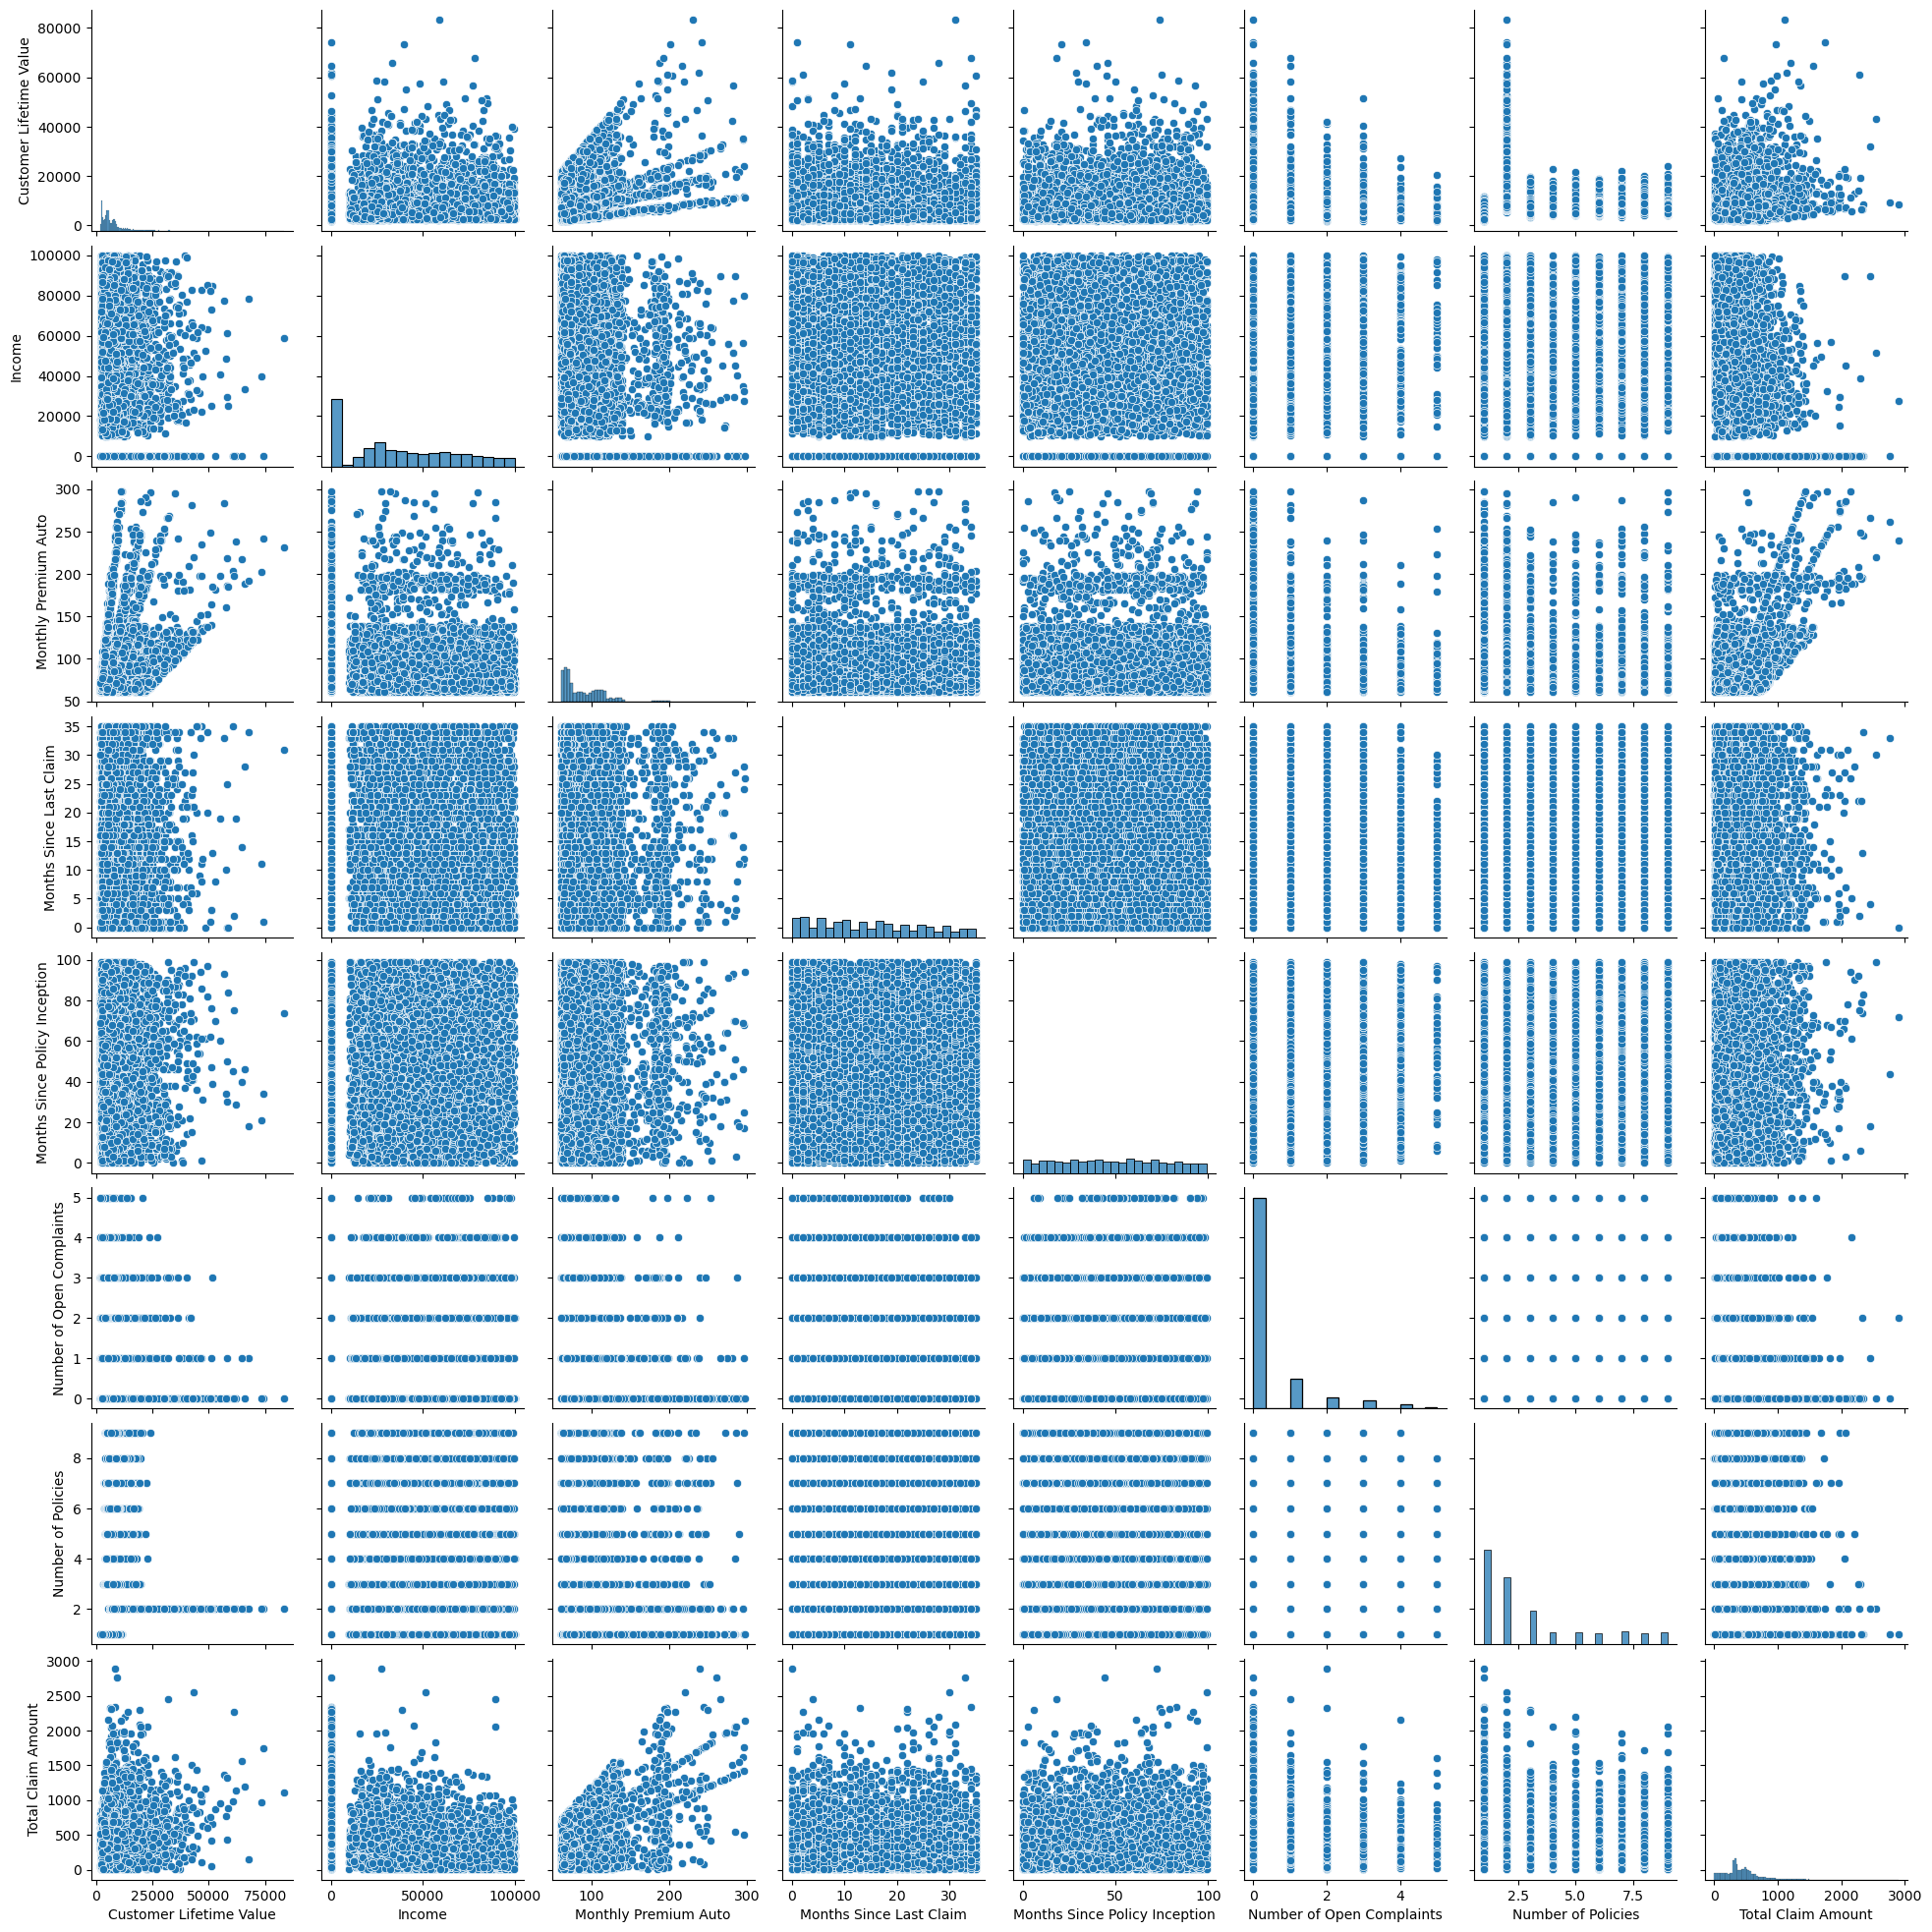

In [39]:
sns.pairplot(df)

<Axes: >

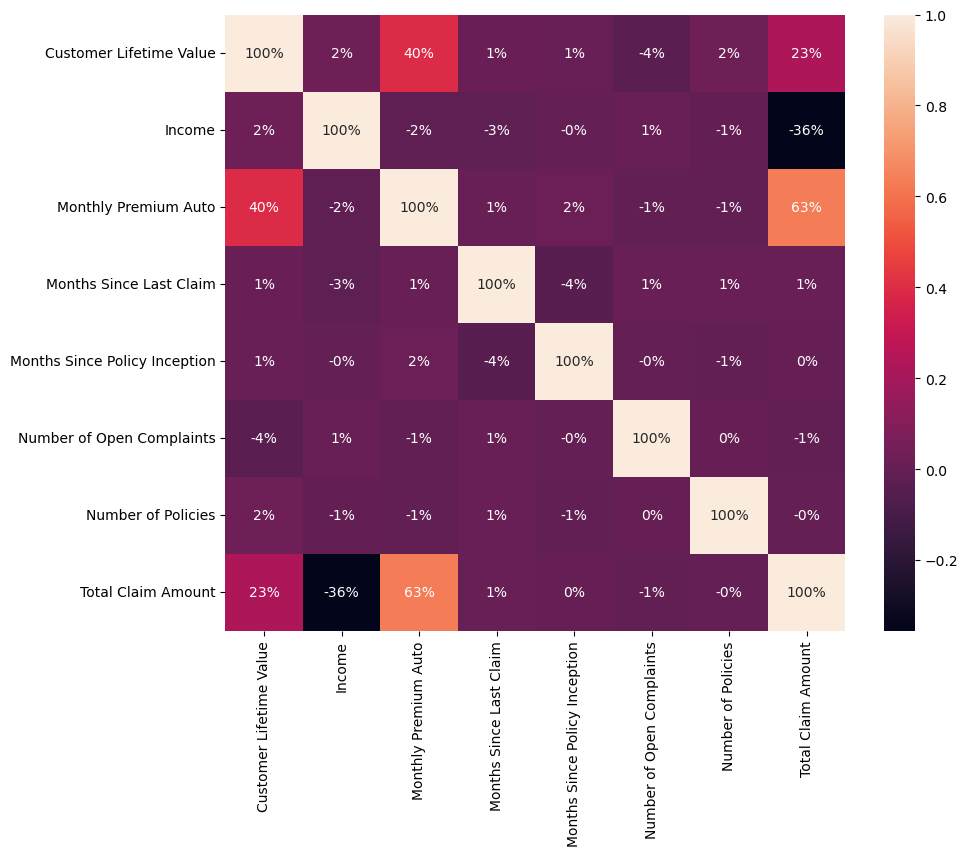

In [40]:
plt.figure(figsize=(10,8))
corr=df.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True,fmt='.0%')

### **Regression Model**

In [41]:
df.skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
le=LabelEncoder()

x=df.select_dtypes(include='number').drop(columns=['Customer Lifetime Value'],axis=1)
y=df['Customer Lifetime Value']

ols = sm.OLS(y, x).fit()


# Print the summary of the model
print(ols.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.644
Model:                                 OLS   Adj. R-squared (uncentered):              0.643
Method:                      Least Squares   F-statistic:                              2356.
Date:                     Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                             01:33:59   Log-Likelihood:                         -92862.
No. Observations:                     9134   AIC:                                  1.857e+05
Df Residuals:                         9127   BIC:                                  1.858e+05
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
                                    coef    std err          t      P>

In [43]:
category_a = df[df['Gender'] == 'F']['Customer Lifetime Value']
category_b = df[df['Gender'] == 'M']['Customer Lifetime Value']

u_statistic, p_value = stats.mannwhitneyu(category_a, category_b)

# Print the results
print("U-statistic:", u_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the distribution of 'Value' between Category A and Category B.")
else:
    print("There is no significant difference in the distribution of 'Value' between Category A and Category B.")

U-statistic: 10512074.0
P-value: 0.48749303056449833
There is no significant difference in the distribution of 'Value' between Category A and Category B.


In [44]:
categorical_columns = df.select_dtypes(include='object')

# print(categorical_columns)
continuous_variable = 'Customer Lifetime Value'

# Create an empty dictionary to store results
results = {}

# Iterate through unique combinations of categories
for column in categorical_columns:
    unique_categories = df[column].unique()

    for i in range(len(unique_categories) - 1):
        for j in range(i + 1, len(unique_categories)):
            category1 = unique_categories[i]
            category2 = unique_categories[j]

            group1 = df[df[column] == category1][continuous_variable]
            group2 = df[df[column] == category2][continuous_variable]

            # Perform Mann-Whitney U test
            u_statistic, p_value = stats.mannwhitneyu(group1, group2)

            # Store the results in the dictionary
            result_key = f'{column}_{category1}_{category2}'
            results[result_key] = {
                'U-statistic': u_statistic,
                'P-value': p_value
            }


# print(results)
# Print or further analyze the results
for key, result in results.items():
    print(key)
    print("U-statistic:", result['U-statistic'])
    print("P-value:", result['P-value'])
    if result['P-value'] < 0.05:
        print("There is a significant difference in the distribution of 'Value' between" + key + "and Category B.")
    else:
        print("There is a significant difference in the distribution of 'Value' between" + key + "and Category B.")



State_Washington_Arizona
U-statistic: 661517.0
P-value: 0.28547105373136783
There is a significant difference in the distribution of 'Value' betweenState_Washington_Arizonaand Category B.
State_Washington_Nevada
U-statistic: 342704.5
P-value: 0.3534916320440473
There is a significant difference in the distribution of 'Value' betweenState_Washington_Nevadaand Category B.
State_Washington_California
U-statistic: 1203513.0
P-value: 0.06367496694497085
There is a significant difference in the distribution of 'Value' betweenState_Washington_Californiaand Category B.
State_Washington_Oregon
U-statistic: 991366.5
P-value: 0.05553290143496726
There is a significant difference in the distribution of 'Value' betweenState_Washington_Oregonand Category B.
State_Arizona_Nevada
U-statistic: 752255.0
P-value: 0.9454279556064935
There is a significant difference in the distribution of 'Value' betweenState_Arizona_Nevadaand Category B.
State_Arizona_California
U-statistic: 2636523.0
P-value: 0.32654862

In [45]:
## Kruskal Test
from scipy.stats import kruskal

category_a = df[df['Gender'] == 'F']['Customer Lifetime Value']
category_b = df[df['Gender'] == 'M']['Customer Lifetime Value']

statistic, p_value = kruskal(category_a, category_b)
# u_statistic, p_value = stats.mannwhitneyu(category_a, category_b)

# Print the results
print("U-statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the distribution of 'Value' between Category A and Category B.")
else:
    print("There is no significant difference in the distribution of 'Value' between Category A and Category B.")

U-statistic: 0.4820603496792097
P-value: 0.48749054213997434
There is no significant difference in the distribution of 'Value' between Category A and Category B.


### **Model Building**

In [46]:
df.describe(include='object')

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,10/1/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [47]:
df['Response']= le.fit_transform(df['Response'])
df['State']= le.fit_transform(df['State'])
df['Coverage']= le.fit_transform(df['Coverage'])
df['Education']= le.fit_transform(df['Education'])
df['EmploymentStatus']= le.fit_transform(df['EmploymentStatus'])
df['Gender']= le.fit_transform(df['Gender'])
df['Location Code']= le.fit_transform(df['Location Code'])
df['Marital Status']= le.fit_transform(df['Marital Status'])
df['Policy Type']= le.fit_transform(df['Policy Type'])
df['Sales Channel']= le.fit_transform(df['Sales Channel'])
df['Policy']= le.fit_transform(df['Policy'])
df['Renew Offer Type']= le.fit_transform(df['Renew Offer Type'])
df['Vehicle Class']= le.fit_transform(df['Vehicle Class'])
df['Vehicle Size']= le.fit_transform(df['Vehicle Size'])

In [48]:
df['Income']=df['Income'].replace(0,df['Income'].median())

In [49]:
df.describe()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.741734,8004.940475,0.143201,0.480622,1.554084,1.825706,0.490037,46254.048664,0.979089,1.120210,93.219291,15.097000,48.064594,0.384388,2.966170,0.825925,3.797788,0.970221,1.102693,434.088794,1.892380,1.089556
std,1.287771,6870.967608,0.350297,0.655817,1.381978,1.347793,0.499928,22200.666227,0.605732,0.636838,34.407967,10.073257,27.905991,0.910384,2.390182,0.475989,1.605978,1.007576,1.069452,290.500092,2.072992,0.537313
min,0.000000,1898.007675,0.000000,0.000000,0.000000,0.000000,0.000000,10037.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,1.000000,3994.251794,0.000000,0.000000,0.000000,1.000000,0.000000,33889.500000,1.000000,1.000000,68.000000,6.000000,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,272.258244,0.000000,1.000000
50%,1.000000,5780.182197,0.000000,0.000000,1.000000,1.000000,0.000000,33893.250000,1.000000,1.000000,83.000000,14.000000,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,3.000000,8962.167041,0.000000,1.000000,3.000000,4.000000,1.000000,62320.000000,1.000000,2.000000,109.000000,23.000000,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,547.514839,4.000000,1.000000
max,4.000000,83325.381190,1.000000,2.000000,4.000000,4.000000,1.000000,99981.000000,2.000000,2.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


In [50]:
x=df.drop(columns=['Customer Lifetime Value','Effective To Date'])
y=df['Customer Lifetime Value']


X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)



In [51]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(n_jobs=78)

model.fit(X_train,Y_train)


LinearRegression(n_jobs=78)

In [52]:
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.164032521590465
0.1645651584947443


In [53]:
### Ridge and Lasso Regression

In [54]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=299.0)  # You can adjust the alpha (regularization strength)
ridge.fit(X_train, Y_train)
print("Train Score (Ridge)",ridge.score(X_train, Y_train))
print("Test Score (Ridge)",ridge.score(X_test, Y_test))


# Lasso Regression
lasso = Lasso(alpha=299.5)  # You can adjust the alpha (regularization strength)
lasso.fit(X_train, Y_train)
print("Train Score (Lasso)",lasso.score(X_train, Y_train))
print("Test Score (Lasso)",lasso.score(X_test, Y_test))

Train Score (Ridge) 0.1638821765310694
Test Score (Ridge) 0.16469718836259883
Train Score (Lasso) 0.1580636391117558
Test Score (Lasso) 0.15953412039926484


In [55]:
## Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=201) # You can adjust the number of estimators (trees)

# Fit the model to the training data
rf_regressor.fit(X_train, Y_train)

print('Random Forest Regressor Train Score',rf_regressor.score(X_train, Y_train))
print('Random Forest Regressor Test Score',rf_regressor.score(X_test, Y_test))

Random Forest Regressor Train Score 0.9573291706455639
Random Forest Regressor Test Score 0.6908078601207279


In [56]:
### Adaboost Regressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create the base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth

# Create the AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)  # You can adjust the number of estimators

# Fit the model to the training data
adaboost_regressor.fit(X_train, Y_train)

print('Ada Boost Regressor Train Score',adaboost_regressor.score(X_train, Y_train))
print('Ada Boost Regressor Test Score',adaboost_regressor.score(X_test, Y_test))

Ada Boost Regressor Train Score 0.5902671638858084
Ada Boost Regressor Test Score 0.5143420920087273


In [57]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

rf_regressor_withGrid = RandomForestRegressor()


In [ ]:
grid_search = GridSearchCV(estimator=rf_regressor_withGrid, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

In [ ]:
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

In [ ]:

print("GridSearch CV Random Forest Train Score: ",best_rf_regressor.score(X_train,Y_train))
print("GridSearch CV Random Forest Test Score: ",best_rf_regressor.score(X_test,Y_test))
